In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import plot
%matplotlib inline


In [50]:
bus4 = pd.read_pickle('completed_bus_routes-bus4.pickle')
bus19 = pd.read_pickle('completed_bus_routes-bus19.pickle')

In [51]:
bus4 = bus4[bus4.time_of_day >= 40000]
bus4 = bus4[bus4.duration < bus4.duration.quantile(0.95)]

In [52]:
bus19 = bus19[bus19.time_of_day >= 40000]
bus19 = bus19[bus19.duration < bus19.duration.quantile(0.95)]

In [24]:
df = bus4

In [25]:
df.columns

Index(['duration', 'distance', 'delay', 'trip_start', 'trip_end',
       'block_start', 'block_end', 'vehicle_id', 'type', 'tripID', 'situation',
       'routeNumber', 'direction', 'bearing', 'lastLocID', 'lastStopSeq',
       'loadPercentage', 'weekday', 'hour', 'weekday_num', 'trip_start_time',
       'time_of_day', 'duration_minutes'],
      dtype='object')

In [27]:
numeric_cols = df.select_dtypes(include=[np.number])

In [28]:
# sns.pairplot(df, kind='reg', y_vars=['duration_minutes'], x_vars=numeric_cols)

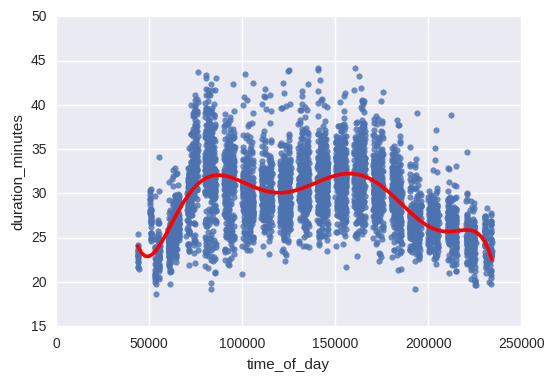

In [83]:
sns.regplot("time_of_day", "duration_minutes", bus4, ci=None, truncate=True, fit_reg=True,  order=7,  line_kws={'color': 'r'})

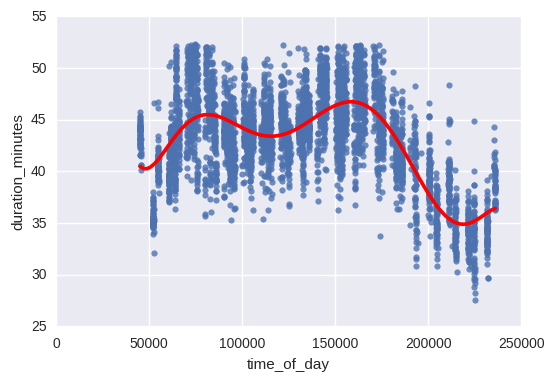

In [82]:
sns.regplot("time_of_day", "duration_minutes", bus19, ci=None, truncate=True, fit_reg=True, order=7, line_kws={'color': 'r'})

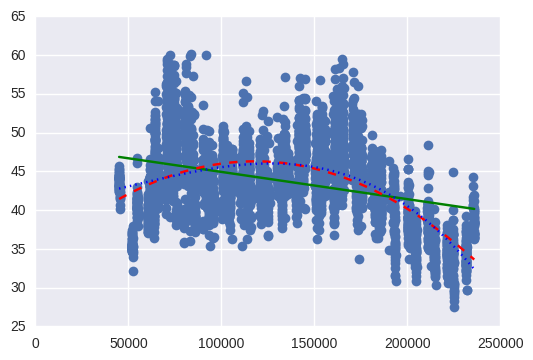

In [97]:
x = df.time_of_day
y = df.duration_minutes
plot(x, y, 'o')

p1 = np.polyfit(x, y, 1)
p2 = np.polyfit(x, y, 2)
p3 = np.polyfit(x, y, 3)

xp = np.linspace(min(x), max(x), 100)
plot(xp, np.polyval(p1, xp), 'g-')
plot(xp, np.polyval(p2, xp), 'r--')
plot(xp, np.polyval(p3, xp), 'b:')

In [ ]:
sns.

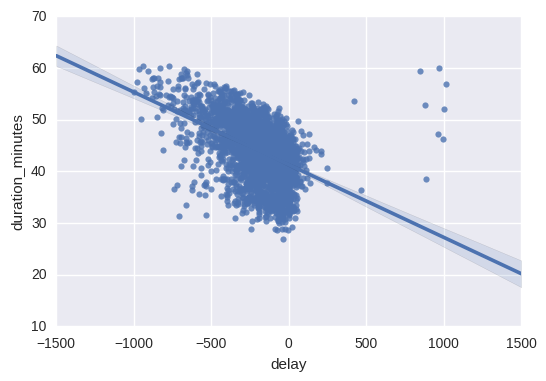

In [15]:
sns.regplot("delay", "duration_minutes", df, fit_reg=True, x_jitter=True, y_jitter=True)

In [16]:
# Can we predict the time of trip based on the Delay at the time of trip start? Or even from a few stops back?

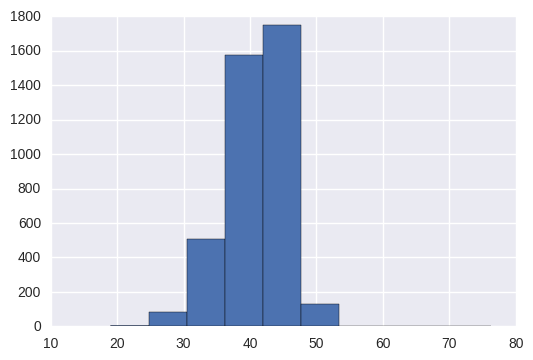

In [26]:
((df.duration.dt.seconds + df.delay)/60).hist()

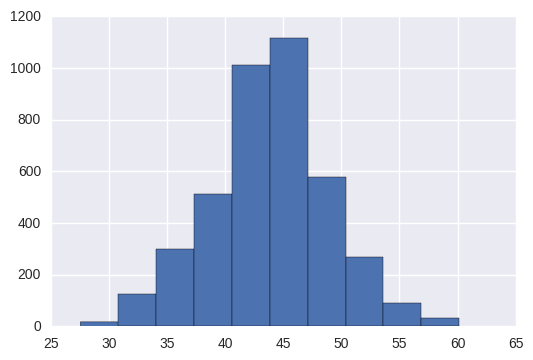

In [28]:
df.duration_minutes.hist()

In [29]:
((df.duration.dt.seconds + df.delay)/60).describe()

count    4057.000000
mean       40.808035
std         4.494630
min        19.033333
25%        38.400000
50%        41.633333
75%        43.616667
max        76.216667
dtype: float64

In [30]:
df.duration.describe()

count                      4057
mean     0 days 00:43:49.611289
std      0 days 00:05:05.201499
min             0 days 00:27:33
25%             0 days 00:40:46
50%             0 days 00:43:58
75%             0 days 00:46:52
max             0 days 01:00:08
Name: duration, dtype: object

In [ ]:
# Can we create a model that uses 3 input variables? Delay at starting bus stop, weekday, time of day.